# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
#import plotly.offline as offline
#import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [5]:
project_data=project_data.sample(n=50000)
project_data.shape

(50000, 17)

In [6]:
project_data["project_is_approved"].value_counts()

1    42451
0     7549
Name: project_is_approved, dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [7]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [9]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [10]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
89610,5719,p027165,fc4e89f607e5b34b2635697958e56477,Mrs.,MI,2016-08-25 11:11:35,Grades 3-5,Interactive Engagement,"My students are dreamers, thinkers, and believ...",A Theremin in my classroom will give my studen...,NaN,NaN,My students need a Theremin. They will be lea...,2,1,Math_Science,AppliedSciences Mathematics,"My students are dreamers, thinkers, and believ..."
39683,93117,p105988,584cbef0f07f9abbaa345582bda67d8d,Mrs.,AL,2016-10-06 23:04:17,Grades PreK-2,Chair Organization,My school serves mostly low income families. ...,An organized environment is ideal for students...,NaN,NaN,My students need chair pockets to help us main...,1,1,SpecialNeeds,SpecialNeeds,My school serves mostly low income families. ...


In [11]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [12]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)

My students are dreamers, thinkers, and believers who happen to also live in a high poverty area.  They are a canvas that is ready to fill up with something beautiful.  They are excited to learn new things this  2016-2017 school year.  They need help getting materials needed.\r\nMy students are eager to rise to the challenge of being the best students they can be. My students are the future leaders of tomorrow.  They are curious and really want to learn.A Theremin in my classroom will give my students a hands-on learning opportunity with sound waves by allowing them to manipulate the waves using the instrument. They will be able to manipulate the Theremin so that different sound waves will be created.  It will be something they will always remember and maybe encourage them to explore music. \r\nThe magnetic graph and fraction tube will also give them the opportunity to demonstrate knowledge gained through and collaboration drawing arrays, visuals for area and perimeter, and creating vi

In [13]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [14]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

We have incredible students at our campus! They come from high-poverty homes that sometimes lack stability, but are well-behaved and hard-working students. Many of them have overcome great challenges but they all have bright futures!\r\n\r\nWe are extremely proud of how motivated our students are! Our campus houses the Regional Day School Program for the Deaf and each grade level has a handful of students who are deaf or hard of hearing. Therefore, we also work alongside great interpreters and deaf ed teachers.We are thrilled to offer physical education instruction to students from a great many backgrounds. We see Pre-K students with disabilities, deaf ed students Pre-K through 5th grade, and every regular ed from the same age group, daily. We seek to provide differentiated instruction that meets the needs of our various student populations.\r\n\r\nWe are anxious to incorporate technology that will allow our students to better access our curriculum. Through the iPad, we are able to pul

In [15]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

We have incredible students at our campus! They come from high-poverty homes that sometimes lack stability, but are well-behaved and hard-working students. Many of them have overcome great challenges but they all have bright futures!    We are extremely proud of how motivated our students are! Our campus houses the Regional Day School Program for the Deaf and each grade level has a handful of students who are deaf or hard of hearing. Therefore, we also work alongside great interpreters and deaf ed teachers.We are thrilled to offer physical education instruction to students from a great many backgrounds. We see Pre-K students with disabilities, deaf ed students Pre-K through 5th grade, and every regular ed from the same age group, daily. We seek to provide differentiated instruction that meets the needs of our various student populations.    We are anxious to incorporate technology that will allow our students to better access our curriculum. Through the iPad, we are able to pull up dem

In [16]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

We have incredible students at our campus They come from high poverty homes that sometimes lack stability but are well behaved and hard working students Many of them have overcome great challenges but they all have bright futures We are extremely proud of how motivated our students are Our campus houses the Regional Day School Program for the Deaf and each grade level has a handful of students who are deaf or hard of hearing Therefore we also work alongside great interpreters and deaf ed teachers We are thrilled to offer physical education instruction to students from a great many backgrounds We see Pre K students with disabilities deaf ed students Pre K through 5th grade and every regular ed from the same age group daily We seek to provide differentiated instruction that meets the needs of our various student populations We are anxious to incorporate technology that will allow our students to better access our curriculum Through the iPad we are able to pull up demonstration videos mus

In [17]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [18]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())
project_data["essay"]=preprocessed_essays    

100%|███████████████████████████████████████████████████████████████████████████| 50000/50000 [01:10<00:00, 712.07it/s]


In [19]:
# after preprocesing
preprocessed_essays[20000]

'incredible students campus come high poverty homes sometimes lack stability well behaved hard working students many overcome great challenges bright futures extremely proud motivated students campus houses regional day school program deaf grade level handful students deaf hard hearing therefore also work alongside great interpreters deaf ed teachers thrilled offer physical education instruction students great many backgrounds see pre k students disabilities deaf ed students pre k 5th grade every regular ed age group daily seek provide differentiated instruction meets needs various student populations anxious incorporate technology allow students better access curriculum ipad able pull demonstration videos music much share students chromecast allow us cast ipad information large tv allows closed captions much piece technology integrate seamlessly together pe instruction nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower().strip() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())
project_data["project_title"]=preprocessed_titles    

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:04<00:00, 11219.69it/s]


In [21]:
preprocessed_titles[:5]

['interactive engagement',
 'chair organization',
 'mindfulness changes everything health class',
 'responding 21st century learners',
 'good character begins']

## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
preprocessed_school_state=[]
for state in tqdm(project_data['school_state'].values):
    state=decontracted(state)
    state=state.replace(".",'')
    state=state.replace('"','')
    state=state.replace('-','')
    state=state.replace('_','')
    state=state.replace(' ','')
    state=re.sub('[^A-za-z]+','',state)
    preprocessed_school_state.append(state.strip())
print(preprocessed_school_state[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 21552.84it/s]


['MI', 'AL', 'CA', 'MA', 'ID', 'NC', 'OR', 'CA', 'MA', 'AR', 'CA', 'HI', 'MO', 'GA', 'LA']


In [24]:
preprocessed_teacher_prefix=[]
for prefix in tqdm(project_data["teacher_prefix"].map(str).values):
    prefix=decontracted(prefix)
    prefix=prefix.replace(".",'')
    prefix=prefix.replace('"','')
    prefix=prefix.replace('-','')
    prefix=prefix.replace('_','')
    prefix=prefix.replace(' ','')
    prefix=re.sub('[^A-Za-z]+','',prefix)
    preprocessed_teacher_prefix.append(prefix.strip())
print(preprocessed_teacher_prefix[:15])

100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 20489.13it/s]


['Mrs', 'Mrs', 'Mrs', 'Ms', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Ms', 'Mrs', 'Ms', 'Ms', 'Mrs', 'Mrs', 'Mrs']


In [25]:
print(project_data["project_grade_category"].values)
preprocessed_project_grade=[]
for grade in tqdm(project_data["project_grade_category"].values):
    grade=decontracted(grade)
    grade=grade.replace('.','')
    grade=grade.replace('"','')
    grade=grade.replace('-','')
    grade=grade.replace(' ','')
    grade=grade.replace('_','')
    grade=re.sub('[^A-Za-z0-9]+','',grade)
    preprocessed_project_grade.append(grade)
print(preprocessed_project_grade[:20])

['Grades 3-5' 'Grades PreK-2' 'Grades 9-12' ... 'Grades 3-5' 'Grades 6-8'
 'Grades 3-5']


100%|█████████████████████████████████████████████████████████████████████████| 50000/50000 [00:02<00:00, 20674.09it/s]


['Grades35', 'GradesPreK2', 'Grades912', 'Grades68', 'Grades68', 'Grades35', 'Grades35', 'Grades35', 'GradesPreK2', 'Grades68', 'Grades35', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'Grades35', 'Grades35', 'GradesPreK2', 'GradesPreK2', 'Grades68', 'Grades912']


### 1.5.3 Vectorizing Numerical features

In [26]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

__ Computing Sentiment Scores__

# Assignment 8: Decision Tree

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [4,6, 8, 9,10,12,14,17] , and the best `min_samples_split` in range [2,10,20,30,40,50])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>min_sample_split</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>min_sample_split</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>            


<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [27]:
project_data=project_data[["teacher_number_of_previously_posted_projects","price","quantity","clean_categories","clean_subcategories","project_title","essay","project_is_approved"]]
project_data["teacher_prefix"]=preprocessed_teacher_prefix
project_data["school_state"]=preprocessed_school_state
project_data["project_grade_category"]=preprocessed_project_grade

In [28]:
from sklearn.model_selection import train_test_split,GridSearchCV
target=project_data["project_is_approved"].values
data=project_data.drop("project_is_approved",axis=1)
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=0)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [29]:
x_train.columns

Index(['teacher_number_of_previously_posted_projects', 'price', 'quantity',
       'clean_categories', 'clean_subcategories', 'project_title', 'essay',
       'teacher_prefix', 'school_state', 'project_grade_category'],
      dtype='object')

In [30]:
from sklearn.preprocessing import StandardScaler
scaler_1=StandardScaler().fit(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_train=scaler_1.transform(x_train["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))
tnoppp_test=scaler_1.transform(x_test["teacher_number_of_previously_posted_projects"].values.reshape(-1,1))

scaler_2=StandardScaler().fit(x_train["price"].values.reshape(-1,1))
price_train=scaler_2.transform(x_train["price"].values.reshape(-1,1))
price_test=scaler_2.transform(x_test["price"].values.reshape(-1,1))

scaler_3=StandardScaler().fit(x_train["quantity"].values.reshape(-1,1))
quantity_train=scaler_3.transform(x_train["quantity"].values.reshape(-1,1))
quantity_test=scaler_3.transform(x_test["quantity"].values.reshape(-1,1))

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer_1=CountVectorizer(lowercase=False,binary=True).fit(x_train["teacher_prefix"].values)
teacher_prefix_train=vectorizer_1.transform(x_train["teacher_prefix"].values)
teacher_prefix_test=vectorizer_1.transform(x_test["teacher_prefix"].values)

vectorizer_2=CountVectorizer(lowercase=False,binary=True).fit(x_train["school_state"].values)
school_state_train=vectorizer_2.transform(x_train["school_state"].values)
school_state_test=vectorizer_2.transform(x_test["school_state"].values)

vectorizer_3=CountVectorizer(lowercase=False,binary=True).fit(x_train["project_grade_category"].values)
project_grade_train=vectorizer_3.transform(x_train["project_grade_category"].values)
project_grade_test=vectorizer_3.transform(x_test["project_grade_category"].values)

vectorizer_4=CountVectorizer(lowercase=False,binary=True).fit(x_train["clean_categories"].values)
clean_categories_train=vectorizer_4.transform(x_train["clean_categories"].values)
clean_categories_test=vectorizer_4.transform(x_test["clean_categories"].values)

vectorizer_5=CountVectorizer(lowercase=False,binary=True).fit(x_train["clean_subcategories"].values)
clean_subcategories_train=vectorizer_5.transform(x_train["clean_subcategories"].values)
clean_subcategories_test=vectorizer_5.transform(x_test["clean_subcategories"].values)


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [31]:
count_vect_titles=CountVectorizer(min_df=5)
train_title_bow=count_vect_titles.fit_transform(x_train["project_title"].values)
test_title_bow=count_vect_titles.transform(x_test["project_title"].values)
count_vect_essays=CountVectorizer(min_df=10)
train_essay_bow=count_vect_essays.fit_transform(x_train["essay"].values)
test_essay_bow=count_vect_essays.transform(x_test["essay"].values)

In [32]:
print(train_title_bow.shape)
print(test_title_bow.shape)
print(train_essay_bow.shape)
print(test_essay_bow.shape)

(35000, 2577)
(15000, 2577)
(35000, 10524)
(15000, 10524)


In [33]:
tfidf_vect_titles=TfidfVectorizer(min_df=5)
train_title_tfidf=tfidf_vect_titles.fit_transform(x_train["project_title"].values)
test_title_tfidf=tfidf_vect_titles.transform(x_test["project_title"].values)
tfidf_vect_essays=TfidfVectorizer(min_df=10)
train_essay_tfidf=tfidf_vect_essays.fit_transform(x_train["essay"].values)
test_essay_tfidf=tfidf_vect_essays.transform(x_test["essay"].values)

In [34]:
print(train_title_tfidf.shape)
print(test_title_tfidf.shape)
print(train_essay_tfidf.shape)
print(test_essay_tfidf.shape)

(35000, 2577)
(15000, 2577)
(35000, 10524)
(15000, 10524)


In [80]:
train_title_list=[]
for i in x_train["project_title"].values:
    train_title_list.append(i.split())
w2v_model_titles=Word2Vec(train_title_list,min_count=5,size=50)
title_w2v_words=w2v_model_titles.wv.vocab

train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_titles.append(vector)

print(len(train_avg_w2v_vectors_titles))
print(len(train_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:01<00:00, 21758.86it/s]


35000
50


In [81]:
test_avg_w2v_vectors_titles = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): 
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): 
        if word in title_w2v_words:
            vector +=w2v_model_titles.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_titles.append(vector)

print(len(test_avg_w2v_vectors_titles))
print(len(test_avg_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 19568.53it/s]


15000
50


In [82]:
train_essay_list=[]
for i in x_train["essay"].values:
    train_essay_list.append(i.split())
    
w2v_model_essays=Word2Vec(train_essay_list,min_count=10,size=50)

essay_w2v_words=w2v_model_essays.wv.vocab
train_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    train_avg_w2v_vectors_essays.append(vector)

print(len(train_avg_w2v_vectors_essays))
print(len(train_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [00:41<00:00, 845.82it/s]


35000
50


In [83]:
test_avg_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in essay_w2v_words:
            vector +=w2v_model_essays.wv[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    test_avg_w2v_vectors_essays.append(vector)

print(len(test_avg_w2v_vectors_essays))
print(len(test_avg_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:20<00:00, 741.05it/s]


15000
50


In [39]:
tfidf_model_titles = TfidfVectorizer()
tfidf_matrix_train_title=tfidf_model_titles.fit_transform(x_train["project_title"].values)
tfidf_matrix_test_title=tfidf_model_titles.transform(x_test["project_title"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_t = dict(zip(tfidf_model_titles.get_feature_names(), list(tfidf_model_titles.idf_)))
tfidf_words_titles = set(tfidf_model_titles.get_feature_names())

train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_titles.append(vector)

print(len(train_tfidf_w2v_vectors_titles))
print(len(train_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:02<00:00, 15646.39it/s]


35000
50


In [40]:
test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["project_title"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in title_w2v_words) and (word in tfidf_words_titles):
            vec = w2v_model_titles.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_t[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_titles.append(vector)

print(len(test_tfidf_w2v_vectors_titles))
print(len(test_tfidf_w2v_vectors_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 15697.18it/s]


15000
50


In [41]:
tfidf_model_essay = TfidfVectorizer()
tfidf_matrix_essay_train=tfidf_model_essay.fit_transform(x_train["essay"].values)
tfidf_matrix_essay_test=tfidf_model_essay.transform(x_test["essay"].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary_e = dict(zip(tfidf_model_essay.get_feature_names(), list(tfidf_model_essay.idf_)))
tfidf_words_essay= set(tfidf_model_essay.get_feature_names())

train_tfidf_w2v_vectors_essays = [] # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0 # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    train_tfidf_w2v_vectors_essays.append(vector)

print(len(train_tfidf_w2v_vectors_essays))
print(len(train_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [02:28<00:00, 235.20it/s]


35000
50


In [42]:
test_tfidf_w2v_vectors_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test["essay"].values): # for each review/sentence
    vector = np.zeros(50) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in essay_w2v_words) and (word in tfidf_words_essay):
            vec = w2v_model_essays.wv[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary_e[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    test_tfidf_w2v_vectors_essays.append(vector)

print(len(test_tfidf_w2v_vectors_essays))
print(len(test_tfidf_w2v_vectors_essays[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [01:05<00:00, 230.43it/s]


15000
50


# Applying DecisionTreeClassifier on set-1

In [35]:
from scipy.sparse import hstack
train_set_1=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_title_bow,train_essay_bow))
test_set_1=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_title_bow,test_essay_bow))

In [36]:
from sklearn.tree import DecisionTreeClassifier

In [37]:
param_grid={"max_depth":[4,6, 8, 9,10,12,14,17],"min_samples_split":[2,10,20,30,40,50]}

In [38]:
model_1=GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_1.fit(train_set_1,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30,

In [39]:
print(model_1.best_estimator_)
print(model_1.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 8, 'min_samples_split': 2}


In [40]:
final_model_1=model_1.best_estimator_
final_model_1.fit(train_set_1,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

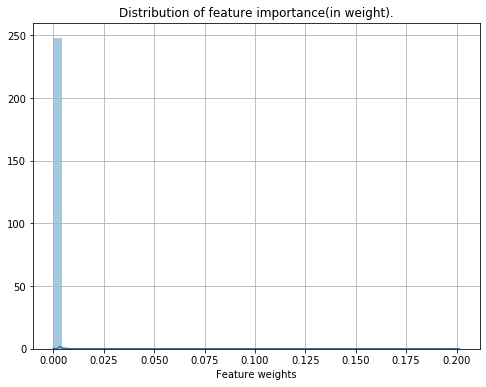

Total number of features :  13204
Number of feature with weight greater then zero :  136


In [47]:
plt.figure(figsize=(8,6))
sns.distplot(final_model_1.feature_importances_)
plt.grid()
plt.title("Distribution of feature importance(in weight).")
plt.xlabel("Feature weights")
plt.show()
print("Total number of features : ",len(final_model_1.feature_importances_))
print("Number of feature with weight greater then zero : ",np.count_nonzero(final_model_1.feature_importances_))

<b>Observation : </b>

Out of 13204 features only 136 features having weight greater than 0.0 , 13068 features have weight equal to 0.0 so there are 136 important features.

In [67]:
imp_features=[]
a=list(final_model_1.feature_importances_)
for imp in a:
    if(imp>0.0):
        imp_features.append(a.index(imp))

In [66]:
data_feature_names_1=(["teacher_number_of_previously_posted_projects","price","quantity"]+list(vectorizer_1.get_feature_names())+list(vectorizer_2.get_feature_names())+list(vectorizer_3.get_feature_names())+list(vectorizer_4.get_feature_names())+list(vectorizer_5.get_feature_names())+list(count_vect_titles.get_feature_names())+list(count_vect_essays.get_feature_names()))

print(len(data_feature_names_1))

13204


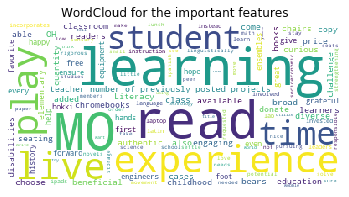

In [71]:
text=' '
for i in imp_features:
    text=text+data_feature_names_1[i]+' '
text=text.strip() 

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.title("WordCloud for the important features")
plt.show()

In [42]:
import graphviz
from sklearn.tree import export_graphviz 
import pydotplus
import collections
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data =export_graphviz(final_model_1,
                                feature_names=data_feature_names_1,
                                out_file=None,
                                filled=True,
                                rounded=True,max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_model_1.png')


True

<b>Visualization of Decision Tree by GraphViz</b>

<img src="tree_model_1.png">

In [48]:
x=list(param_grid["min_samples_split"])
y=list(param_grid["max_depth"])
z_train=list(model_1.cv_results_["mean_train_score"])
z_cv=list(model_1.cv_results_["mean_test_score"])

In [49]:
matrix_1_train=np.array(z_train).reshape(8,6)

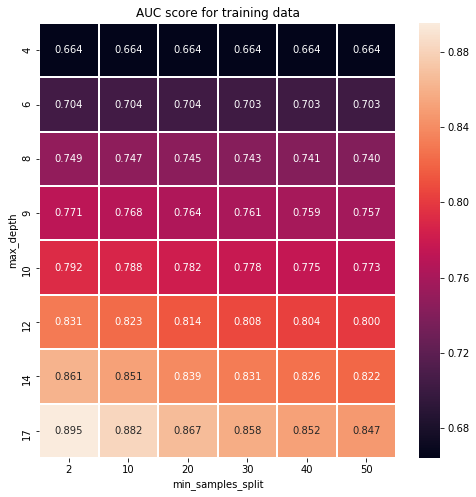

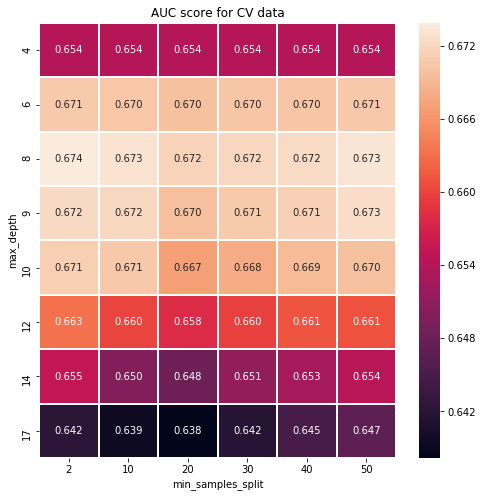

In [50]:
plt.figure(figsize=(8,8))
sns.heatmap(matrix_1_train,annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for training data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,8))
sns.heatmap(np.array(z_cv).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for CV data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [51]:
pred_train_1=final_model_1.predict(train_set_1)
prob_train_1=final_model_1.predict_proba(train_set_1)
pred_test_1=final_model_1.predict(test_set_1)
prob_test_1=final_model_1.predict_proba(test_set_1)

In [52]:
from sklearn.metrics import roc_auc_score,roc_curve
print("ROC AUC score on Train dataset : ",roc_auc_score(y_train,prob_train_1[:,1]))
print("Roc auc score on test data : ",roc_auc_score(y_test,prob_test_1[:,1]))

ROC AUC score on Train dataset :  0.7471707012102352
Roc auc score on test data :  0.6691517262870977


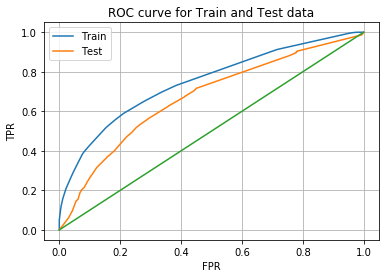

In [53]:
train_fpr_1,train_tpr_1,thresholds=roc_curve(y_train,prob_train_1[:,1])
test_fpr_1,test_tpr_1,thresholds=roc_curve(y_test,prob_test_1[:,1])
plt.plot(train_fpr_1,train_tpr_1,label="Train")
plt.plot(test_fpr_1,test_tpr_1,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

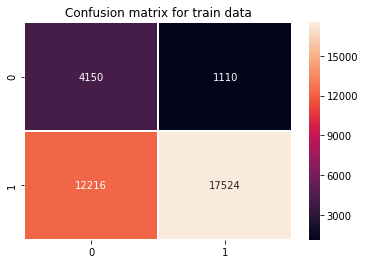

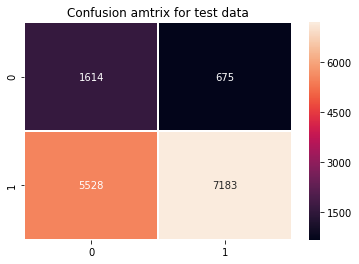

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,pred_train_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_1),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

In [55]:
x_test=x_test.reset_index()
false_positive_data=[]
for i,j,k in zip(list(y_test),list(pred_test_1),list(range(len(y_test)))):
    if(i==0 and j==1):
        false_positive_data.append(x_test.iloc[k])

In [56]:
print(len(false_positive_data))

675


In [57]:
false_positive=pd.DataFrame(data=false_positive_data,columns=x_test.columns)

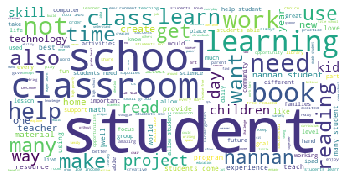

In [58]:
from wordcloud import WordCloud
text=' '
for essay in false_positive["essay"].values:
    tokens=essay.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower().strip()
    for word in tokens:
        text=text+word+' '
text=text.strip()

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

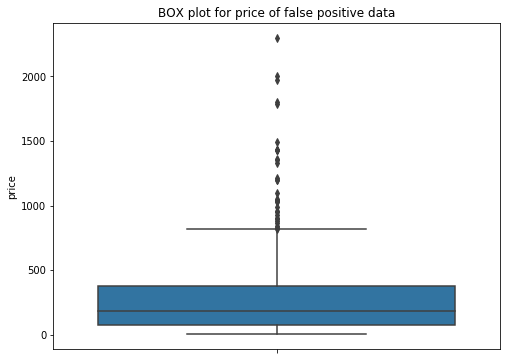

In [59]:
plt.figure(figsize=(8,6))
sns.boxplot(data=false_positive,y=false_positive["price"])
plt.title("BOX plot for price of false positive data")
plt.show()

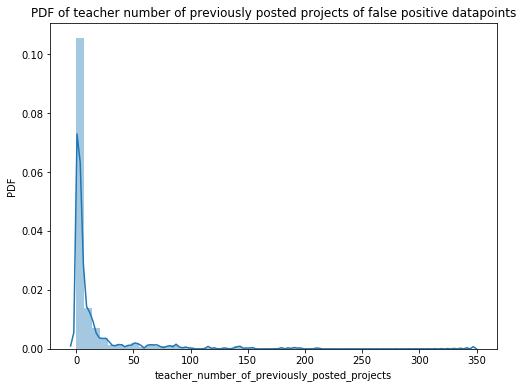

In [60]:
plt.figure(figsize=(8,6))
sns.distplot(false_positive["teacher_number_of_previously_posted_projects"])
plt.title("PDF of teacher number of previously posted projects of false positive datapoints")
plt.ylabel("PDF")
plt.show()

# Applying DecisionTreeClassifier on set-2

In [61]:
train_set_2=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_title_tfidf,train_essay_tfidf))
test_set_2=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_title_tfidf,test_essay_tfidf))

In [62]:
model_2=GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_2.fit(train_set_2,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30,

In [72]:
print(model_2.best_estimator_)
print("="*50)
print(model_2.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 8, 'min_samples_split': 2}


In [73]:
print("Train AUC score : ",model_2.score(train_set_2,y_train))
print("="*50)
print("Test AUC score : ",model_2.score(test_set_2,y_test))

Train AUC score :  0.762545987915547
Test AUC score :  0.6696674937023721


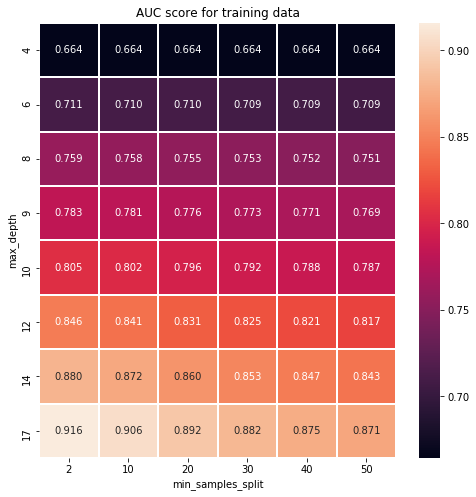

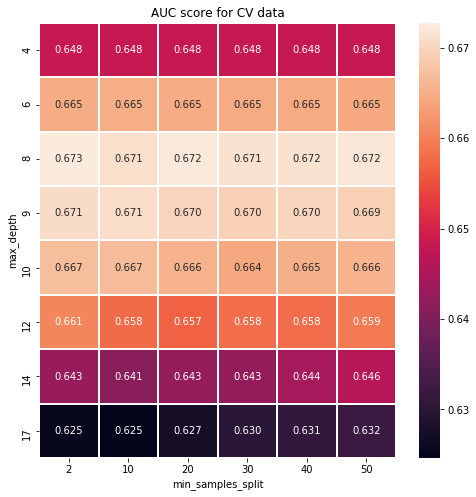

In [74]:
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_2.cv_results_["mean_train_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for training data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_2.cv_results_["mean_test_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for CV data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [75]:
final_model_2=model_2.best_estimator_
final_model_2.fit(train_set_2,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
data_feature_names_2=(["teacher_number_of_previously_posted_projects","price","quantity"]+list(vectorizer_1.get_feature_names())+list(vectorizer_2.get_feature_names())+list(vectorizer_3.get_feature_names())+list(vectorizer_4.get_feature_names())+list(vectorizer_5.get_feature_names())+list(tfidf_vect_titles.get_feature_names())+list(tfidf_vect_essays.get_feature_names()))

print(len(data_feature_names_2))

13204


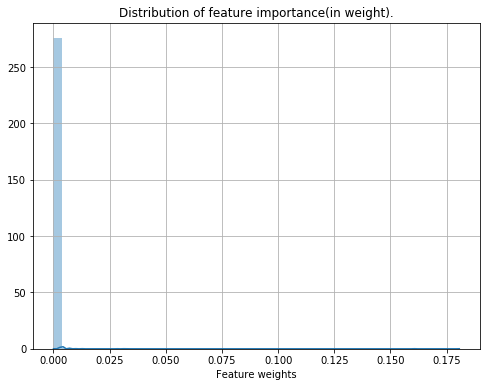

Total number of features :  13204
Number of feature with weight greater then zero :  124


In [77]:
plt.figure(figsize=(8,6))
sns.distplot(final_model_2.feature_importances_)
plt.grid()
plt.title("Distribution of feature importance(in weight).")
plt.xlabel("Feature weights")
plt.show()
print("Total number of features : ",len(final_model_2.feature_importances_))
print("Number of feature with weight greater then zero : ",np.count_nonzero(final_model_2.feature_importances_))

In [78]:
imp_features_2=[]
b=list(final_model_2.feature_importances_)
for imp in b:
    if(imp>0.0):
        imp_features_2.append(b.index(imp))

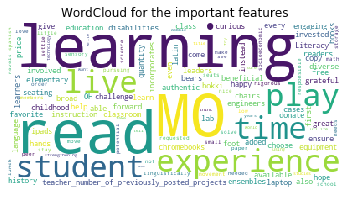

In [79]:
text=' '
for i in imp_features:
    text=text+data_feature_names_2[i]+' '
text=text.strip() 

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.title("WordCloud for the important features")
plt.show()

In [80]:
import graphviz
from sklearn.tree import export_graphviz 
import pydotplus
import collections
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data =export_graphviz(final_model_2,
                                feature_names=data_feature_names_2,
                                out_file=None,
                                filled=True,
                                rounded=True,max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('green', 'red')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree_model_2.png')

True

<b>Visualizaton of Decision Tree with Graphviz</b>

<img src="tree_model_2.png">

In [81]:
pred_train_2=final_model_2.predict(train_set_2)
prob_train_2=final_model_2.predict_proba(train_set_2)
pred_test_2=final_model_2.predict(test_set_2)
prob_test_2=final_model_2.predict_proba(test_set_2)

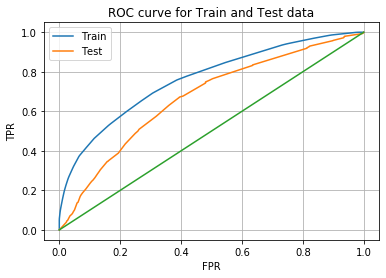

In [82]:
train_fpr_2,train_tpr_2,thresholds=roc_curve(y_train,prob_train_2[:,1])
test_fpr_2,test_tpr_2,thresholds=roc_curve(y_test,prob_test_2[:,1])
plt.plot(train_fpr_2,train_tpr_2,label="Train")
plt.plot(test_fpr_2,test_tpr_2,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

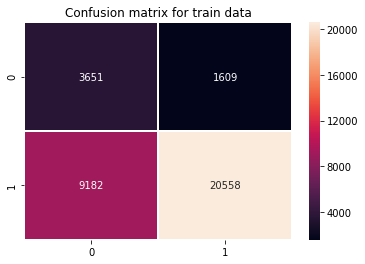

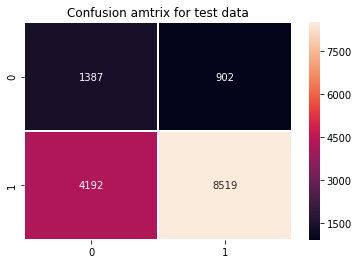

In [83]:
sns.heatmap(confusion_matrix(y_train,pred_train_2),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_2),annot=True,fmt="d",linewidths="1")
plt.title("Confusion amtrix for test data")
plt.show()

In [84]:
false_positive_data_2=[]
for i,j,k in zip(list(y_test),list(pred_test_2),list(range(len(y_test)))):
    if(i==0 and j==1):
        false_positive_data_2.append(x_test.iloc[k])
print(len(false_positive_data_2))        

902


In [85]:
false_positive_2=pd.DataFrame(data=false_positive_data_2,columns=x_test.columns)

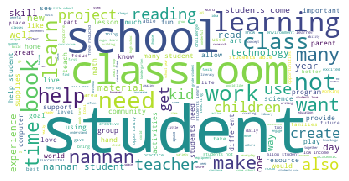

In [86]:
from wordcloud import WordCloud
text=' '
for essay in false_positive_2["essay"].values:
    tokens=essay.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower().strip()
    for word in tokens:
        text=text+word+' '
text=text.strip()

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

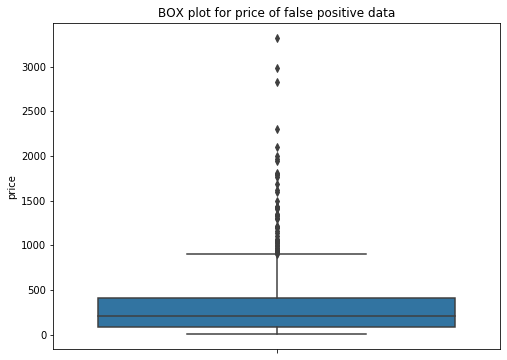

In [87]:
plt.figure(figsize=(8,6))
sns.boxplot(data=false_positive_2,y=false_positive_2["price"])
plt.title("BOX plot for price of false positive data")
plt.show()

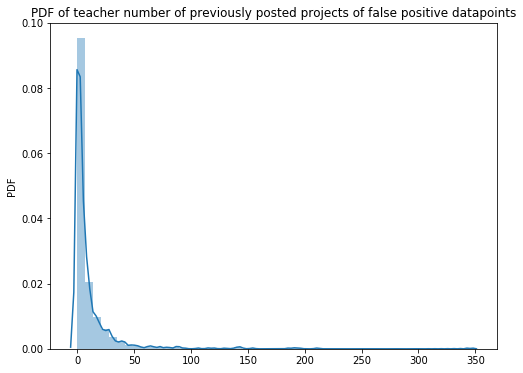

In [88]:
plt.figure(figsize=(8,6))
sns.distplot(false_positive_2["teacher_number_of_previously_posted_projects"].values)
plt.title("PDF of teacher number of previously posted projects of false positive datapoints")
plt.ylabel("PDF")
plt.show()

# Applying DecisionTreeClassifier on set-3

In [84]:
train_set_3=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_avg_w2v_vectors_titles,train_avg_w2v_vectors_essays))
test_set_3=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_avg_w2v_vectors_titles,test_avg_w2v_vectors_essays))

In [85]:
model_3=GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_3.fit(train_set_3,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30,

In [86]:
print(model_3.best_estimator_)
print("="*50)
print(model_3.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 6, 'min_samples_split': 40}


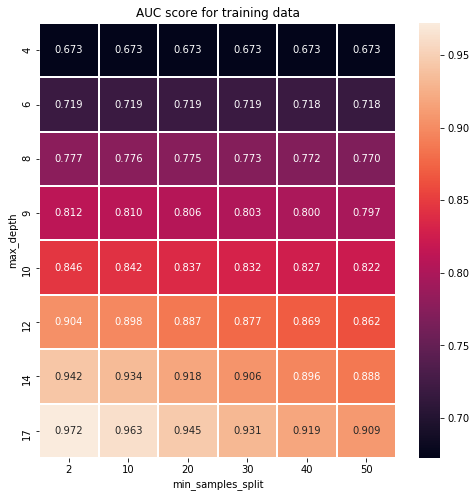

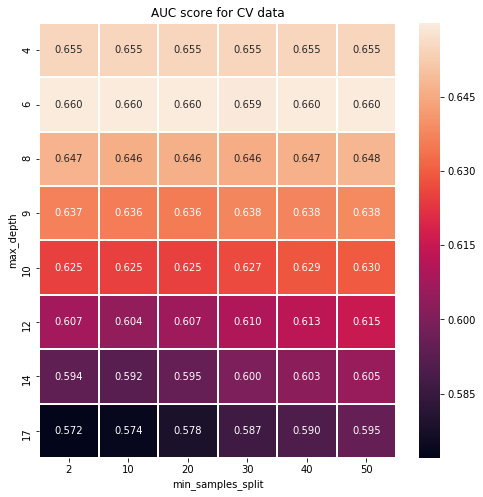

In [87]:
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_3.cv_results_["mean_train_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for training data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_3.cv_results_["mean_test_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for CV data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [88]:
final_model_3=model_3.best_estimator_
final_model_3.fit(train_set_3,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
pred_train_3=final_model_3.predict(train_set_3)
prob_train_3=final_model_3.predict_proba(train_set_3)
pred_test_3=final_model_3.predict(test_set_3)
prob_test_3=final_model_3.predict_proba(test_set_3)

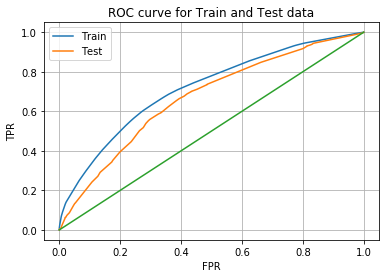

In [90]:
train_fpr_3,train_tpr_3,thresholds=roc_curve(y_train,prob_train_3[:,1])
test_fpr_3,test_tpr_3,thresholds=roc_curve(y_test,prob_test_3[:,1])
plt.plot(train_fpr_3,train_tpr_3,label="Train")
plt.plot(test_fpr_3,test_tpr_3,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [91]:
print("Train AUC score : ",roc_auc_score(y_train,prob_train_3[:,1]))
print("Test AUC score : ",roc_auc_score(y_test,prob_test_3[:,1]))

Train AUC score :  0.7156180077866442
Test AUC score :  0.6670601605459162


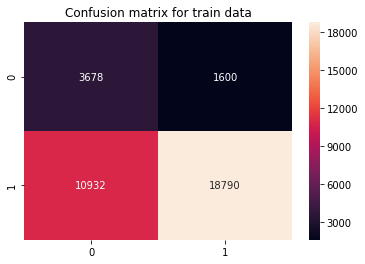

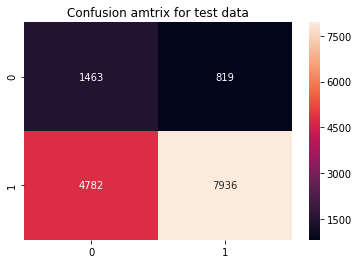

In [92]:
sns.heatmap(confusion_matrix(y_train,pred_train_3),annot=True,fmt="d")
plt.title("Confusion matrix for train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_3),annot=True,fmt="d")
plt.title("Confusion amtrix for test data")
plt.show()

In [93]:
false_positive_data_3=[]
for i,j,k in zip(list(y_test),list(pred_test_3),list(range(len(y_test)))):
    if(i==0 and j==1):
        false_positive_data_3.append(x_test.iloc[k])
print(len(false_positive_data_3))

819


In [94]:
false_positive_3=pd.DataFrame(data=false_positive_data_3,columns=x_test.columns)

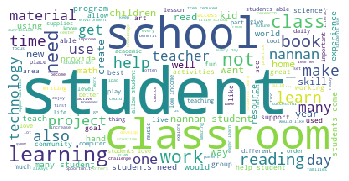

In [95]:
from wordcloud import WordCloud
text=' '
for essay in false_positive_3["essay"].values:
    tokens=essay.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower().strip()
    for word in tokens:
        text=text+word+' '
text=text.strip()

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

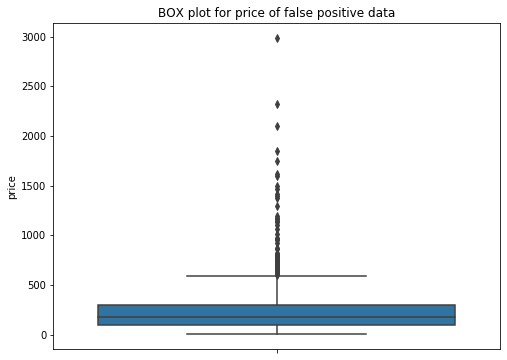

In [96]:
plt.figure(figsize=(8,6))
sns.boxplot(data=false_positive_3,y=false_positive_3["price"])
plt.title("BOX plot for price of false positive data")
plt.show()

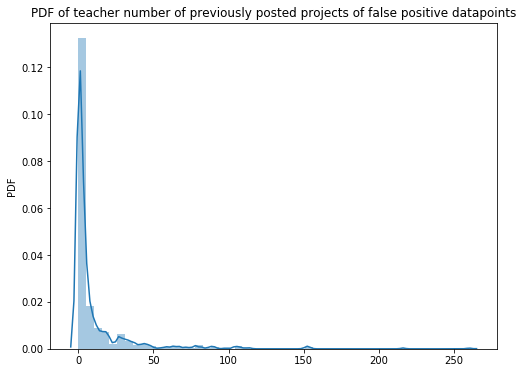

In [97]:
plt.figure(figsize=(8,6))
sns.distplot(false_positive_3["teacher_number_of_previously_posted_projects"].values)
plt.title("PDF of teacher number of previously posted projects of false positive datapoints")
plt.ylabel("PDF")
plt.show()

# Applying DecisionTreeClassifier on set-4

In [112]:
train_set_4=hstack((tnoppp_train,price_train,quantity_train,teacher_prefix_train,school_state_train,project_grade_train,clean_categories_train,clean_subcategories_train,train_tfidf_w2v_vectors_titles,train_tfidf_w2v_vectors_essays))
test_set_4=hstack((tnoppp_test,price_test,quantity_test,teacher_prefix_test,school_state_test,project_grade_test,clean_categories_test,clean_subcategories_test,test_tfidf_w2v_vectors_titles,test_tfidf_w2v_vectors_essays))

In [113]:
model_4=GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_4.fit(train_set_4,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30,

In [114]:
print(model_4.best_estimator_)
print("="*50)
print(model_4.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 6, 'min_samples_split': 20}


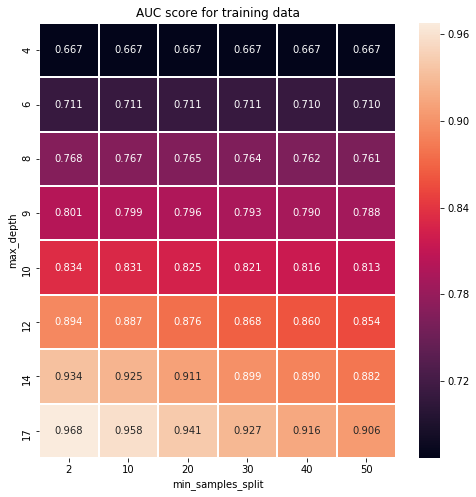

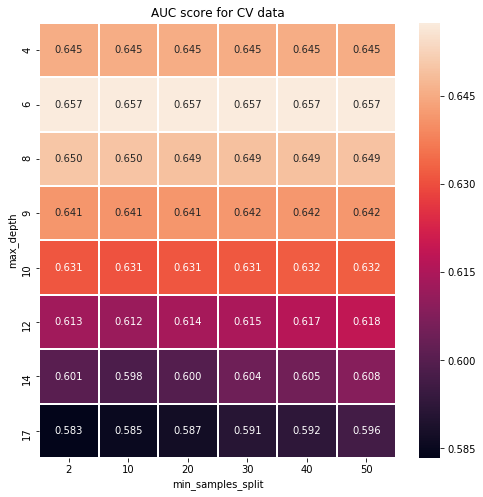

In [161]:
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_4.cv_results_["mean_train_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for training data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_4.cv_results_["mean_test_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for CV data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [116]:
final_model_4=model_4.best_estimator_
final_model_4.fit(train_set_4,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [117]:
pred_train_4=final_model_4.predict(train_set_4)
prob_train_4=final_model_4.predict_proba(train_set_4)
pred_test_4=final_model_4.predict(test_set_4)
prob_test_4=final_model_4.predict_proba(test_set_4)

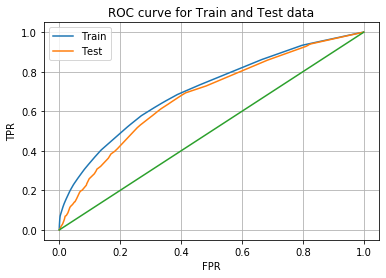

In [118]:
train_fpr_4,train_tpr_4,thresholds=roc_curve(y_train,prob_train_4[:,1])
test_fpr_4,test_tpr_4,thresholds=roc_curve(y_test,prob_test_4[:,1])
plt.plot(train_fpr_4,train_tpr_4,label="Train")
plt.plot(test_fpr_4,test_tpr_4,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [119]:
print("Train AUC score : ",roc_auc_score(y_train,prob_train_4[:,1]))
print("Test AUC score : ",roc_auc_score(y_test,prob_test_4[:,1]))

Train AUC score :  0.7057591982718034
Test AUC score :  0.6761790183711066


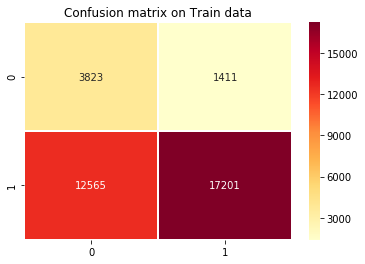

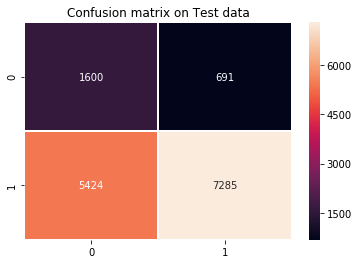

In [121]:
sns.heatmap(confusion_matrix(y_train,pred_train_4),annot=True,fmt="d",linewidths="1",cmap="YlOrRd")
plt.title("Confusion matrix on Train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_4),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix on Test data")
plt.show()

In [122]:
false_positive_data_4=[]
for i,j,k in zip(list(y_test),list(pred_test_4),list(range(len(y_test)))):
    if(i==0 and j==1):
        false_positive_data_4.append(x_test.iloc[k])
print(len(false_positive_data_4))

691


In [123]:
false_positive_4=pd.DataFrame(data=false_positive_data_4,columns=x_test.columns)

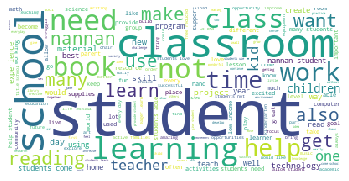

In [124]:
text=' '
for essay in false_positive_4["essay"].values:
    tokens=essay.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower().strip()
    for word in tokens:
        text=text+word+' '
text=text.strip()

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

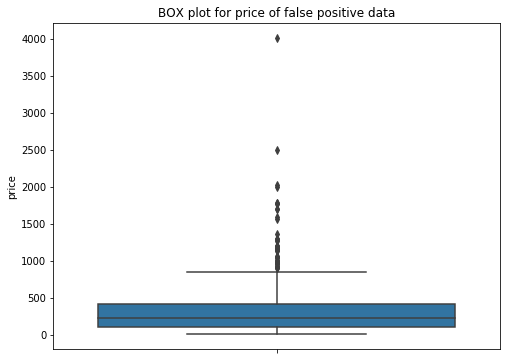

In [125]:
plt.figure(figsize=(8,6))
sns.boxplot(data=false_positive_4,y=false_positive_4["price"])
plt.title("BOX plot for price of false positive data")
plt.show()

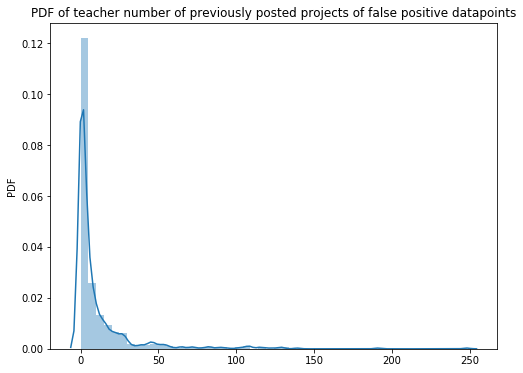

In [126]:
plt.figure(figsize=(8,6))
sns.distplot(false_positive_4["teacher_number_of_previously_posted_projects"].values)
plt.title("PDF of teacher number of previously posted projects of false positive datapoints")
plt.ylabel("PDF")
plt.show()

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [59]:
print("Number of features in set 2: ",len(final_model_2.feature_importances_))
print("Number of nonzero weights : ",np.count_nonzero(final_model_2.feature_importances_))        

Number of features in set 2:  13252
Number of nonzero weights :  92


In [60]:
index=[]
for value in list(final_model_2.feature_importances_):
    if(value>0.0):
        index.append(list(final_model_2.feature_importances_).index(value))
len(index)        

92

In [61]:
zero_index=[]
count=0
for value in list(final_model_2.feature_importances_):
    if(value==0.0):
        zero_index.append(list(final_model_2.feature_importances_).index(value))
print(len(zero_index))
len(zero_index[:4908])

13160


4908

In [62]:
index=sorted(index+zero_index)
index=index[::-1]
index=index[:5000]
len(index)

5000

In [63]:
train_set_5=train_set_2.toarray()[:,index]

In [64]:
test_set_5=test_set_2.toarray()[:,index]

In [65]:
train_set_5.shape

(35000, 5000)

In [66]:
model_5=GridSearchCV(DecisionTreeClassifier(class_weight="balanced"),param_grid,cv=10,scoring="roc_auc",return_train_score=True)
model_5.fit(train_set_5,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 9, 10, 12, 14, 17],
                         'min_samples_split': [2, 10, 20, 30,

In [67]:
print(model_5.best_estimator_)
print(model_5.best_params_)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
{'max_depth': 10, 'min_samples_split': 50}


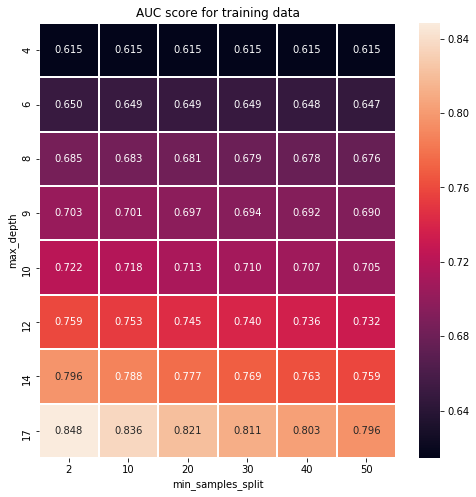

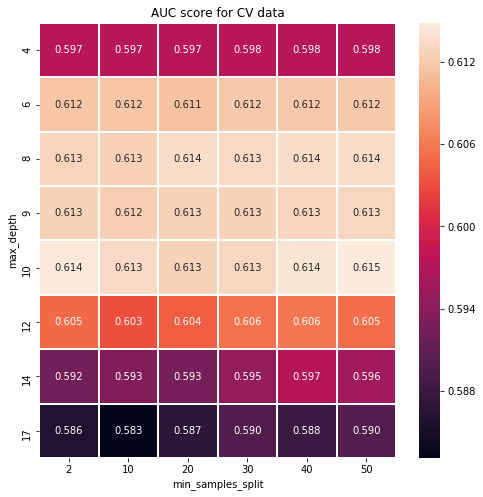

In [70]:
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_5.cv_results_["mean_train_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for training data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()
plt.figure(figsize=(8,8))
sns.heatmap(np.array(list(model_5.cv_results_["mean_test_score"])).reshape(8,6),annot=True,fmt=".3f",linewidths="1",xticklabels=x, yticklabels=y)
plt.title("AUC score for CV data")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.show()

In [68]:
final_model_5=model_5.best_estimator_
final_model_5.fit(train_set_5,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
pred_train_5=final_model_5.predict(train_set_5)
prob_train_5=final_model_5.predict_proba(train_set_5)
pred_test_5=final_model_5.predict(test_set_5)
prob_test_5=final_model_5.predict_proba(test_set_5)

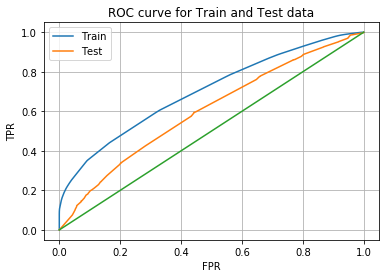

In [71]:
train_fpr_5,train_tpr_5,thresholds=roc_curve(y_train,prob_train_5[:,1])
test_fpr_5,test_tpr_5,thresholds=roc_curve(y_test,prob_test_5[:,1])
plt.plot(train_fpr_5,train_tpr_5,label="Train")
plt.plot(test_fpr_5,test_tpr_5,label="Test")
plt.title("ROC curve for Train and Test data")
plt.plot([0.0,1.0],[0.0,1.0])
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import roc_auc_score
print("Train AUC score : ",roc_auc_score(y_train,prob_train_5[:,1]))
print("Test AUC score : ",roc_auc_score(y_test,prob_test_5[:,1]))

Train AUC score :  0.6996638440300861
Test AUC score :  0.6016211538946574


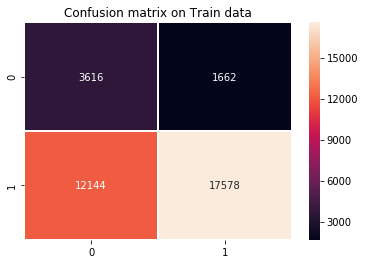

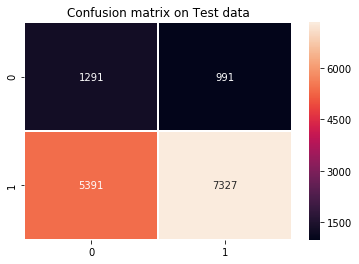

In [73]:
sns.heatmap(confusion_matrix(y_train,pred_train_5),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix on Train data")
plt.show()
sns.heatmap(confusion_matrix(y_test,pred_test_5),annot=True,fmt="d",linewidths="1")
plt.title("Confusion matrix on Test data")
plt.show()

In [74]:
false_positive_data_5=[]
for i,j,k in zip(list(y_test),list(pred_test_5),list(range(len(y_test)))):
    if(i==0 and j==1):
        false_positive_data_5.append(x_test.iloc[k])
print(len(false_positive_data_5))

991


In [75]:
false_positive_5=pd.DataFrame(data=false_positive_data_5,columns=x_test.columns)

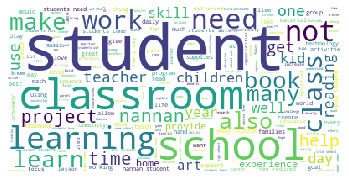

In [76]:
text=' '
for essay in false_positive_5["essay"].values:
    tokens=essay.split()
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower().strip()
    for word in tokens:
        text=text+word+' '
text=text.strip()

cloud=WordCloud(background_color="white",stopwords=stopwords).generate(text)
plt.imshow(cloud)
plt.axis("off")
plt.show()

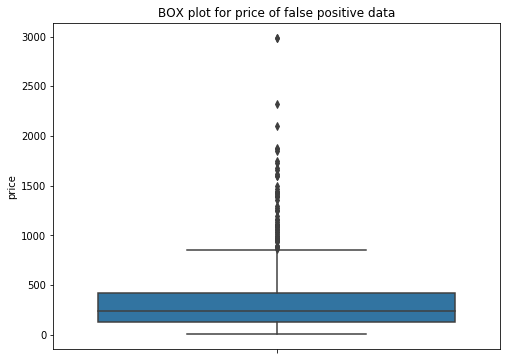

In [77]:
plt.figure(figsize=(8,6))
sns.boxplot(data=false_positive_5,y=false_positive_5["price"])
plt.title("BOX plot for price of false positive data")
plt.show()

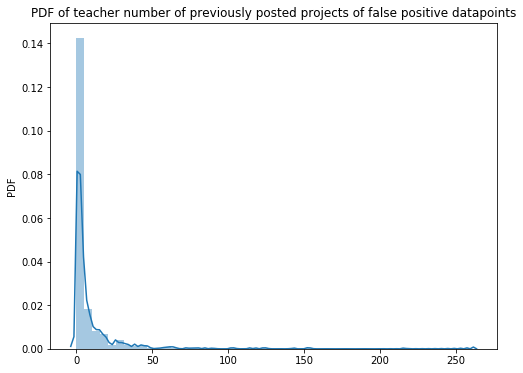

In [78]:
plt.figure(figsize=(8,6))
sns.distplot(false_positive_5["teacher_number_of_previously_posted_projects"].values)
plt.title("PDF of teacher number of previously posted projects of false positive datapoints")
plt.ylabel("PDF")
plt.show()

<h1>3. Conclusion</h1>

In [98]:
from prettytable import PrettyTable
table=PrettyTable()
table.field_names=["Model","Max Depth","Min samples split","Vectorizer","Train AUC score","Test AUC score"]
table.add_row(["Decision tree",9,50,"BOW",0.75,0.67])
table.add_row(["Decision tree",8,50,"Tfidf",0.75,0.67])
table.add_row(["Decision tree",6,40,"Avg W2V",0.71,0.67])
table.add_row(["Decision tree",6,20,"Tfidf W2V",0.70,0.67])
table.add_row(["Decision tree",10,50,"5k best",0.69,0.60])
print(table)

+---------------+-----------+-------------------+------------+-----------------+----------------+
|     Model     | Max Depth | Min samples split | Vectorizer | Train AUC score | Test AUC score |
+---------------+-----------+-------------------+------------+-----------------+----------------+
| Decision tree |     9     |         50        |    BOW     |       0.75      |      0.67      |
| Decision tree |     8     |         50        |   Tfidf    |       0.75      |      0.67      |
| Decision tree |     6     |         40        |  Avg W2V   |       0.71      |      0.67      |
| Decision tree |     6     |         20        | Tfidf W2V  |       0.7       |      0.67      |
| Decision tree |     10    |         50        |  5k best   |       0.69      |      0.6       |
+---------------+-----------+-------------------+------------+-----------------+----------------+


Model_1 and model_2 gave same train and test score but max depth of model_1 is 9 while max depth of model_2 is 8 so model_2 is less prone to the outliers and hence out of these 5 models model_2 is the best one.